<a href="https://colab.research.google.com/github/woshro/ml-projects/blob/main/%5Ckbd-ady-classificator%5Cady_kbd_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from datasets import load_dataset
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from time import time


**License**

This dataset is licensed under the [Creative Commons Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/) license.

```bibtex
@dataset{adiga-ai_circassian-russian_v1,
  author       = {Anzor Qunash},
  title        = {Circassian-Russian Parallel Text Corpus v1.0},
  year         = {2025},
  publisher    = {adiga.ai},
  url          = {https://huggingface.co/datasets/adiga-ai/circassian-parallel-corpus}
}
```

## **Структура** данных



### Data Instances

Each example is a dictionary containing a translation pair:

```json
{
  "translation": {
    "kbd": "Уи пщэдджыжь фIыуэ!",
    "ru": "Доброе утро!"
  }
}
```

### Data Splits

| Split | Source | Target | Examples |
|-------|--------|--------|----------|
| kbd_ru | East Circassian | Russian | 120,218 |
| ru_kbd | Russian | East Circassian | 99,956 |
| ady_ru | West Circassian | Russian | 57,305 |
| ru_ady | Russian | West Circassian | 53,989 |
| Total | | | 331,468 |

## Dataset Creation

### Source Data

Source texts were collected from publicly available sources, including crowdsourced texts, dictionary entries, folklore texts, lists of proverbs and sayings. The specific sources for each language pair are detailed below.

For folklore texts, special processing was applied to create high-quality translation pairs:
- Works without existing Russian translations were translated from scratch into Russian and then split into sentence pairs
- Works with existing Russian translations were refined by converting "artistic" translations into more precise, literal translations better suited for machine translation training

This approach ensured that the parallel text pairs maintain semantic equivalence while being more suitable for training translation models than purely literary translations that might prioritize style over precision.

### Data Quality and Processing

All data was verified for quality either manually or through automated processes. The dataset underwent rigorous cleaning and preprocessing:

- **Translation methodology**: All non-dictionary translations were created from scratch or substantially reworked to ensure semantic accuracy for machine translation training, rather than literary quality.
- **Quality Verification**: The majority of entries were checked for accuracy and completeness by a native speaker.
- **Standardization**: All [palochka](https://en.wikipedia.org/wiki/Palochka)-like characters (1, l, I, І, ӏ) were standardized to uppercase palochka (Ӏ).
- **Script Consistency**: Look-alike Latin letters were converted to their Cyrillic equivalents to maintain script consistency.
- **Deduplication**: Duplicate entries were identified and removed to ensure dataset quality.
- **Filtering**: Entries with imbalanced text lengths or other quality issues were filtered out.
- **Normalization**: Special characters and spacing were normalized across all texts.

These processing steps helped ensure the dataset's consistency and reliability for machine translation tasks.

## Considerations for Using the Data

This dataset was created to support the development of machine translation systems for the Circassian language, contributing to language preservation and digital accessibility for Circassian speakers. Researchers working with this data should be aware that:

- The two Circassian dialects (Kabardian and Adyghe) are structurally related but differ in phonology, vocabulary, and some grammatical features
- The corpus contains texts from various time periods and domains, which may exhibit stylistic and lexical differences
- While extensive cleaning has been performed, some translation pairs may still contain minor inaccuracies
- For optimal results in machine translation tasks, models should be trained on each dialect separately


# Загрузка данных

In [ ]:
from datasets import load_dataset

# Login using e.g. `huggingface-cli login` to access this dataset
ds = load_dataset("adiga-ai/circassian-parallel-corpus", verification_mode="no_checks")

In [ ]:
# посмотрим на данные
print(ds)
print("\nПример кабардинского:", ds["kbd_ru"][0])
print("Пример адыгейского:", ds["ady_ru"][0])

DatasetDict({
    ru_kbd: Dataset({
        features: ['translation'],
        num_rows: 99956
    })
    kbd_ru: Dataset({
        features: ['translation'],
        num_rows: 120218
    })
    ru_ady: Dataset({
        features: ['translation'],
        num_rows: 53989
    })
    ady_ru: Dataset({
        features: ['translation'],
        num_rows: 57305
    })
})

Пример кабардинского: {'translation': '{"kbd": "ублэрэкӀын", "ru": "переворачивать"}'}
Пример адыгейского: {'translation': '{"ady": "Къэбарэу Тхьэм ы Къо тэ къытиӀуагъэу къышъодгъэӀурэр мары: Тхьэр – нэфын, шӀункӀыгъи ащ хэлъэп.", "ru": "Вот весть, которую нам сказал Сын Божий и которую мы передаем вам: Бог – свет, и нет в Нем никакой тьмы."}'}


## Распарсим данные

Классы такие
*   Кабардинский (label = 0)
*   Адыгейский (label = 1)



In [ ]:
import json

texts = []
labels = []

# Кабардинский (label = 0)
print("Собираем кабардинские тексты...")

# Из kbd_ru
for ex in ds["kbd_ru"]:
    translation_dict = json.loads(ex["translation"])
    texts.append(translation_dict["kbd"])
    labels.append(0)

# Из ru_kbd
for ex in ds["ru_kbd"]:
    translation_dict = json.loads(ex["translation"])
    texts.append(translation_dict["kbd"])
    labels.append(0)

print(f"Кабардинских текстов: {labels.count(0)}")

# Адыгейский (label = 1)
print("Собираем адыгейские тексты...")

# Из ady_ru
for ex in ds["ady_ru"]:
    translation_dict = json.loads(ex["translation"])
    texts.append(translation_dict["ady"])
    labels.append(1)

# Из ru_ady
for ex in ds["ru_ady"]:
    translation_dict = json.loads(ex["translation"])
    texts.append(translation_dict["ady"])
    labels.append(1)

print(f"Адыгейских текстов: {labels.count(1)}")
print(f"\nВсего примеров: {len(texts)}")

# Посмотрим несколько примеров
print("\n=== Примеры ===")
print(f"Кабардинский: {texts[0]}")
print(f"Адыгейский: {texts[220174]}")  # Первый адыгейский

Собираем кабардинские тексты...
Кабардинских текстов: 220174
Собираем адыгейские тексты...
Адыгейских текстов: 111294

Всего примеров: 331468

=== Примеры ===
Кабардинский: ублэрэкӀын
Адыгейский: Къэбарэу Тхьэм ы Къо тэ къытиӀуагъэу къышъодгъэӀурэр мары: Тхьэр – нэфын, шӀункӀыгъи ащ хэлъэп.


## Разделение на train/test

Соотношение: 20% данных в тест, 80% в обучение. Стандартное для больших датасетов

`stratify=labels` Сохраняет пропорции классов в train и test. В датасете ~66% кабардинского и ~34% адыгейского, поэтому без stratify можно случайно получить несбалансированные выборки.

### Проблема несбалансированных выборок:

Допустим что в train получилось 70% кабардинского, а в test — 60%.

Тогда:
* Модель переобучится на кабардинский
* Поулчится высокая точность на train, но низкая на test.
* Несправедливое сравнение - если изменить параметры модели и заново разделить данные, результаты будут несопоставимы из-за разного баланса





In [ ]:
print("Разделение данных на train/test...")
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42, stratify=labels
)

print(f"Train: {len(X_train)} примеров")
print(f"Test: {len(X_test)} примеров\n")


Разделение данных на train/test...
Train: 265174 примеров
Test: 66294 примеров



## Векторизация текстов
В качестве Baseline удем исопльзовать TF-IDF

В качестве analyzer выберем `char'

* Сложная морфология (много приставок, суффиксов)
* Специфические символы (Ӏ, къ, гъ)
* Характерные сочетания, которые лучше ловятся на уровне символов

В качестве n-граммы выберем `1-3-граммы`

* Короткие n-граммы (1-2) - слишком общие
* Длинные (4-5+) - слишком специфичные, разреженные
* (1,3) - золотая середина для большинства задач

Разреженная матрица (sparse matrix)

Большинство значений = 0, хранятся только ненулевые → экономия памяти!



In [ ]:
# Векторизация текстов (TF-IDF)
print("Векторизация текстов с помощью TF-IDF...")
vectorizer = TfidfVectorizer(
    max_features=5000,  # Ограничиваем количество признаков
    ngram_range=(1, 3),  # Используем uni-, bi- и tri-граммы символов
    analyzer='char',  # Анализируем по символам (важно для морфологически богатых языков)
    min_df=2  # Минимальная частота появления признака
)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print(f"Размерность векторов: {X_train_vec.shape[1]}\n")

# Обучение логистической регрессии

In [ ]:
print("Обучение логистической регрессии...")
clf = LogisticRegression(
    max_iter=1000,
    random_state=42,
    C=1.0,  # Параметр регуляризации
    solver='lbfgs'
)

clf.fit(X_train_vec, y_train)
print("Обучение завершено!\n")

# Предсказания
y_pred = clf.predict(X_test_vec)


Обучение логистической регрессии...
Обучение завершено!



РЕЗУЛЬТАТЫ КЛАССИФИКАЦИИ

Точность (Accuracy): 0.9395

Детальный отчет:
                    precision    recall  f1-score   support

Кабардинский (kbd)     0.9386    0.9725    0.9553     44035
  Адыгейский (ady)     0.9414    0.8742    0.9065     22259

          accuracy                         0.9395     66294
         macro avg     0.9400    0.9233    0.9309     66294
      weighted avg     0.9395    0.9395    0.9389     66294


Матрица ошибок:
[[42823  1212]
 [ 2800 19459]]


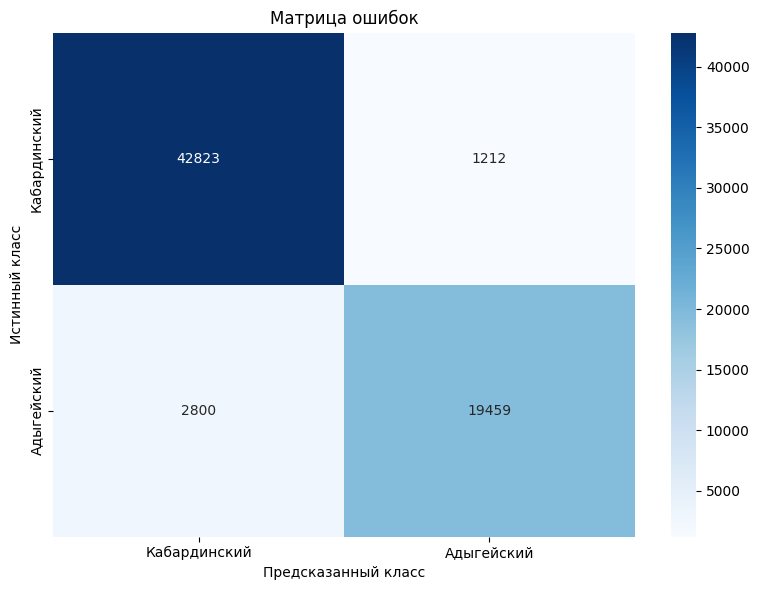


ПРИМЕРЫ ПРЕДСКАЗАНИЙ

Текст: ублэрэкӀын
Истинная метка: Кабардинский
Предсказание: Адыгейский
Вероятности: Кабардинский=0.4920, Адыгейский=0.5080

Текст: Къэбарэу Тхьэм ы Къо тэ къытиӀуагъэу къышъодгъэӀурэр мары
Истинная метка: Адыгейский
Предсказание: Адыгейский
Вероятности: Кабардинский=0.0005, Адыгейский=0.9995

ТОП-20 ВАЖНЫХ ПРИЗНАКОВ

Признаки, характерные для КАБАРДИНСКОГО:
  'уэ': -20.7850
  'щӏ': -14.4889
  'ху': -11.5760
  'фӏ': -10.1285
  'гъэ': -8.2864
  'ъуэ': -7.8539
  'ей': -7.7126
  'щхь': -7.4836
  'э': -7.2872
  'щӏэ': -7.1368
  'щ': -7.0076
  'ж': -6.9707
  'ӏуэ': -6.8070
  ' и ': -6.7407
  'быд': -6.4999
  'гъу': -6.0507
  'щ.': -6.0485
  '.': -6.0010
  'и ': -5.7250
  'ныг': -5.7087

Признаки, характерные для АДЫГЕЙСКОГО:
  'шӏ': 12.9466
  'шъ': 12.6258
  'жъ': 10.2848
  'ӏо': 8.6877
  'ъ': 8.6002
  'ьан': 8.5947
  'чӏ': 7.9905
  'хьа': 7.3496
  ' ы': 7.1698
  'ъо': 7.0630
  'чъ': 6.8562
  'шху': 6.6151
  'ныр': 6.5481
  'щхы': 6.4530
  'рэр': 6.4226
  'о': 6.4046


In [ ]:

# Оценка модели
print("=" * 60)
print("РЕЗУЛЬТАТЫ КЛАССИФИКАЦИИ")
print("=" * 60)
print(f"\nТочность (Accuracy): {accuracy_score(y_test, y_pred):.4f}\n")

print("Детальный отчет:")
print(classification_report(
    y_test, y_pred,
    target_names=['Кабардинский (kbd)', 'Адыгейский (ady)'],
    digits=4
))

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
print("\nМатрица ошибок:")
print(cm)

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Кабардинский', 'Адыгейский'],
    yticklabels=['Кабардинский', 'Адыгейский']
)
plt.title('Матрица ошибок')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.tight_layout()
plt.show()

# Примеры предсказаний
print("\n" + "=" * 60)
print("ПРИМЕРЫ ПРЕДСКАЗАНИЙ")
print("=" * 60)

test_examples = [
    ("ублэрэкӀын", "Кабардинский"),
    ("Къэбарэу Тхьэм ы Къо тэ къытиӀуагъэу къышъодгъэӀурэр мары", "Адыгейский"),
]

for text, true_label in test_examples:
    text_vec = vectorizer.transform([text])
    pred = clf.predict(text_vec)[0]
    pred_proba = clf.predict_proba(text_vec)[0]
    pred_label = "Кабардинский" if pred == 0 else "Адыгейский"

    print(f"\nТекст: {text}")
    print(f"Истинная метка: {true_label}")
    print(f"Предсказание: {pred_label}")
    print(f"Вероятности: Кабардинский={pred_proba[0]:.4f}, Адыгейский={pred_proba[1]:.4f}")

# Топ важных признаков для каждого класса
print("\n" + "=" * 60)
print("ТОП-20 ВАЖНЫХ ПРИЗНАКОВ")
print("=" * 60)

feature_names = vectorizer.get_feature_names_out()
coef = clf.coef_[0]

# Признаки для кабардинского (отрицательные коэффициенты)
top_kbd_indices = np.argsort(coef)[:20]
print("\nПризнаки, характерные для КАБАРДИНСКОГО:")
for idx in top_kbd_indices:
    print(f"  '{feature_names[idx]}': {coef[idx]:.4f}")

# Признаки для адыгейского (положительные коэффициенты)
top_ady_indices = np.argsort(coef)[-20:][::-1]
print("\nПризнаки, характерные для АДЫГЕЙСКОГО:")
for idx in top_ady_indices:
    print(f"  '{feature_names[idx]}': {coef[idx]:.4f}")

# Эксперименты с векторизацией

Создадим код для экспериментов с разными подходами векторизации. Сравним результаты и выберем лучший вариант.

In [ ]:
experiments = [
    # Эксперименты с символьными n-граммами
    {
        'name': 'Char 1-gram',
        'vectorizer': TfidfVectorizer(analyzer='char', ngram_range=(1, 1), max_features=5000, min_df=2)
    },
    {
        'name': 'Char 1-2gram',
        'vectorizer': TfidfVectorizer(analyzer='char', ngram_range=(1, 2), max_features=5000, min_df=2)
    },
    {
        'name': 'Char 1-3gram',
        'vectorizer': TfidfVectorizer(analyzer='char', ngram_range=(1, 3), max_features=5000, min_df=2)
    },
    {
        'name': 'Char 2-4gram',
        'vectorizer': TfidfVectorizer(analyzer='char', ngram_range=(2, 4), max_features=5000, min_df=2)
    },

    # Эксперименты со словесными n-граммами
    {
        'name': 'Word 1-gram',
        'vectorizer': TfidfVectorizer(analyzer='word', ngram_range=(1, 1), max_features=5000, min_df=2)
    },
    {
        'name': 'Word 1-2gram',
        'vectorizer': TfidfVectorizer(analyzer='word', ngram_range=(1, 2), max_features=5000, min_df=2)
    },

    # Эксперименты с CountVectorizer (вместо TF-IDF)
    {
        'name': 'Count Char 1-3gram',
        'vectorizer': CountVectorizer(analyzer='char', ngram_range=(1, 3), max_features=5000, min_df=2)
    },
    {
        'name': 'Count Word 1-gram',
        'vectorizer': CountVectorizer(analyzer='word', ngram_range=(1, 1), max_features=5000, min_df=2)
    },

    # Эксперимент с большим количеством признаков
    {
        'name': 'Char 1-3gram (10k features)',
        'vectorizer': TfidfVectorizer(analyzer='char', ngram_range=(1, 3), max_features=10000, min_df=2)
    },
]

print(f"Подготовлено {len(experiments)} экспериментов:\n")
for i, exp in enumerate(experiments, 1):
    print(f"   {i}. {exp['name']}")

📋 Подготовлено 9 экспериментов:

   1. Char 1-gram
   2. Char 1-2gram
   3. Char 1-3gram
   4. Char 2-4gram
   5. Word 1-gram
   6. Word 1-2gram
   7. Count Char 1-3gram
   8. Count Word 1-gram
   9. Char 1-3gram (10k features)


## Запуск экспериментов

In [ ]:
results = []

for i, exp in enumerate(experiments, 1):
    print(f" Эксперимент {i}/{len(experiments)}: {exp['name']}")
    print("-" * 70)

    start_time = time()

    # Векторизация
    print("   Векторизация...", end=" ")
    vectorizer = exp['vectorizer']
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    vec_time = time() - start_time
    print(f"✓ ({vec_time:.2f}s)")

    # Обучение модели
    print("   Обучение модели...", end=" ")
    clf = LogisticRegression(max_iter=1000, random_state=42, solver='lbfgs')
    clf.fit(X_train_vec, y_train)
    train_time = time() - start_time - vec_time
    print(f"✓ ({train_time:.2f}s)")

    # Предсказания
    print("   Предсказания...", end=" ")
    y_pred = clf.predict(X_test_vec)
    pred_time = time() - start_time - vec_time - train_time
    print(f"✓ ({pred_time:.2f}s)")

    # Метрики
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    total_time = time() - start_time

    # Сохранение результатов
    results.append({
        'Эксперимент': exp['name'],
        'Accuracy': accuracy,
        'F1-Score': f1,
        'Признаков': X_train_vec.shape[1],
        'Разреженность (%)': (X_train_vec.nnz / (X_train_vec.shape[0] * X_train_vec.shape[1])) * 100,
        'Время (сек)': total_time
    })

    print(f"    Accuracy: {accuracy:.4f}, F1-Score: {f1:.4f}")
    print(f"     Общее время: {total_time:.2f}s\n")

df_results = pd.DataFrame(results)
df_results = df_results.sort_values('Accuracy', ascending=False)

print(df_results.to_string(index=False))

# Находим лучший эксперимент
best_exp = df_results.iloc[0]
print(f"\n ЛУЧШИЙ РЕЗУЛЬТАТ:")
print(f"   {best_exp['Эксперимент']}")
print(f"   Accuracy: {best_exp['Accuracy']:.4f}")
print(f"   F1-Score: {best_exp['F1-Score']:.4f}")



ЗАПУСК ЭКСПЕРИМЕНТОВ

🔬 Эксперимент 1/9: Char 1-gram
----------------------------------------------------------------------
   Векторизация... ✓ (7.30s)
   Обучение модели... ✓ (1.76s)
   Предсказания... ✓ (0.00s)
   📊 Accuracy: 0.7933, F1-Score: 0.7845
   ⏱️  Общее время: 9.16s

🔬 Эксперимент 2/9: Char 1-2gram
----------------------------------------------------------------------
   Векторизация... ✓ (12.14s)
   Обучение модели... ✓ (4.19s)
   Предсказания... ✓ (0.01s)
   📊 Accuracy: 0.9162, F1-Score: 0.9153
   ⏱️  Общее время: 16.43s

🔬 Эксперимент 3/9: Char 1-3gram
----------------------------------------------------------------------
   Векторизация... ✓ (22.39s)
   Обучение модели... ✓ (6.59s)
   Предсказания... ✓ (0.02s)
   📊 Accuracy: 0.9395, F1-Score: 0.9389
   ⏱️  Общее время: 29.04s

🔬 Эксперимент 4/9: Char 2-4gram
----------------------------------------------------------------------
   Векторизация... ✓ (32.02s)
   Обучение модели... ✓ (3.42s)
   Предсказания... ✓ (0.01s)


## Визуализация


ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ



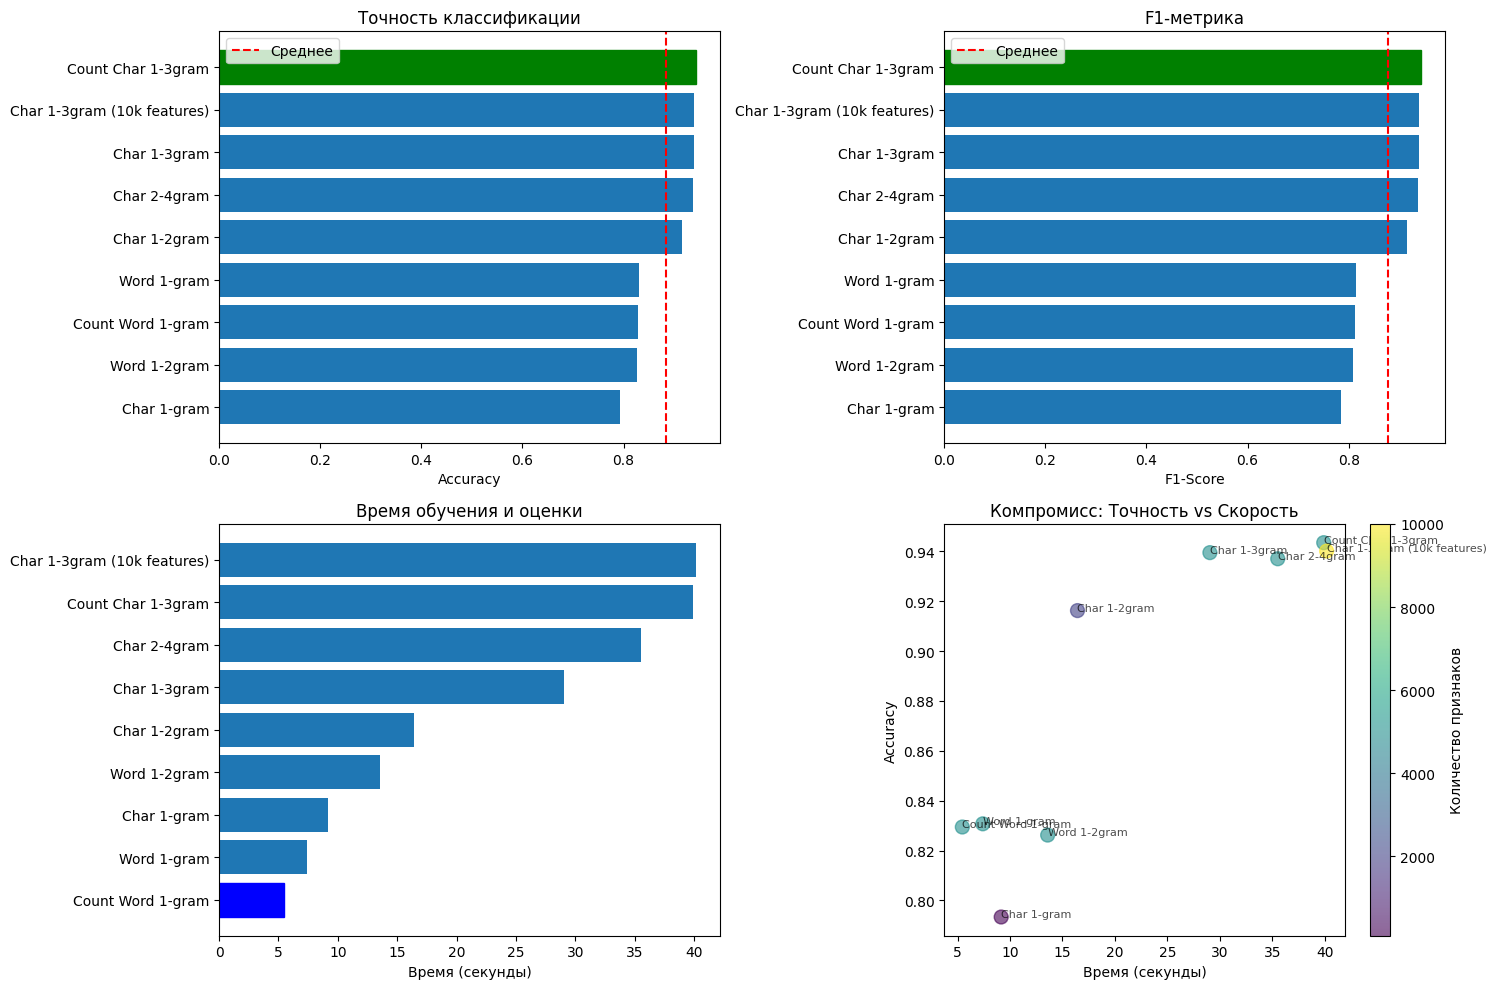

✅ Графики построены!

💡 РЕКОМЕНДАЦИИ

На основе результатов:

1. Лучшая точность: Count Char 1-3gram (0.9435)

2. Если важна скорость: выберите эксперимент с меньшим временем выполнения

3. Попробуйте добавить свои эксперименты в список 'experiments':
   - Измените max_features (например, 3000 или 15000)
   - Попробуйте другие диапазоны n-грамм (3-5, 1-4)
   - Измените min_df (например, 3 или 5)
   - Используйте char_wb analyzer (word boundaries для символов)

4. Для дальнейшей работы используйте лучший vectorizer из эксперимента!



In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Accuracy по экспериментам
ax1 = axes[0, 0]
df_results_sorted = df_results.sort_values('Accuracy')
bars1 = ax1.barh(df_results_sorted['Эксперимент'], df_results_sorted['Accuracy'])
# Подсветка лучшего результата
bars1[-1].set_color('green')
ax1.set_xlabel('Accuracy')
ax1.set_title('Точность классификации')
ax1.axvline(x=df_results['Accuracy'].mean(), color='red', linestyle='--', label='Среднее')
ax1.legend()

# 2. F1-Score по экспериментам
ax2 = axes[0, 1]
df_results_sorted_f1 = df_results.sort_values('F1-Score')
bars2 = ax2.barh(df_results_sorted_f1['Эксперимент'], df_results_sorted_f1['F1-Score'])
bars2[-1].set_color('green')
ax2.set_xlabel('F1-Score')
ax2.set_title('F1-метрика')
ax2.axvline(x=df_results['F1-Score'].mean(), color='red', linestyle='--', label='Среднее')
ax2.legend()

# 3. Время выполнения
ax3 = axes[1, 0]
df_results_sorted_time = df_results.sort_values('Время (сек)')
bars3 = ax3.barh(df_results_sorted_time['Эксперимент'], df_results_sorted_time['Время (сек)'])
bars3[0].set_color('blue')
ax3.set_xlabel('Время (секунды)')
ax3.set_title('Время обучения и оценки')

# 4. Accuracy vs Время
ax4 = axes[1, 1]
scatter = ax4.scatter(df_results['Время (сек)'], df_results['Accuracy'],
                     s=100, alpha=0.6, c=df_results['Признаков'], cmap='viridis')
for idx, row in df_results.iterrows():
    ax4.annotate(row['Эксперимент'],
                (row['Время (сек)'], row['Accuracy']),
                fontsize=8, alpha=0.7)
ax4.set_xlabel('Время (секунды)')
ax4.set_ylabel('Accuracy')
ax4.set_title('Компромисс: Точность vs Скорость')
plt.colorbar(scatter, ax=ax4, label='Количество признаков')

plt.tight_layout()
plt.show()



print(f"""
На основе результатов:

1. Лучшая точность: {best_exp['Эксперимент']} ({best_exp['Accuracy']:.4f})

2. Если важна скорость: выберите эксперимент с меньшим временем выполнения

3. Попробуйте добавить свои эксперименты в список 'experiments':
   - Измените max_features (например, 3000 или 15000)
   - Попробуйте другие диапазоны n-грамм (3-5, 1-4)
   - Измените min_df (например, 3 или 5)
   - Используйте char_wb analyzer (word boundaries для символов)

4. Для дальнейшей работы используйте лучший vectorizer из эксперимента!
""")

В качестве Baseline Были выбраны TF-IDF Char 1-3gram,  в ходе эксперимента лучший результат получился при Count Char 1-3gram (+0.34% accuracy).

| Метрика | Count Char 1-3gram (5k) | TF-IDF Char 1-3gram (10k) |
|---------|-------------------------|---------------------------|
| **Accuracy** | **0.9435** 🏆 | 0.9401 |
| **F1-Score** | **0.9431** 🏆 | 0.9395 |
| **Время** | 39.89s | 40.17s |
| **Признаков** | 5,000 | 10,000 |

Выводы:
1. Для различения кабардинского и адыгейского простая частота важнее редкости признаков.  
    * Простые частоты эффективнее - различия языков могут быть в том, КАК ЧАСТО используются одни и те же символы/сочетания, а не в наличии уникальных редких сочетаний
    * TF-IDF занижает важные признаки - если какая-то n-грамма часто встречается в обоих языках, TF-IDF снизит её вес, хотя ЧАСТОТА её использования может различаться

2. Больше признаков ≠ лучше результат
    * 10k признаков дали хуже результат, чем 5k
    * Это типичное переобучение или шум от слишком редких n-грамм
    * 5k признаков - оптимальный баланс
3.  Пародоксально но 10к признаков TF-IDF обучаются быстрее чем Count
    Count 5k:  векторизация 22.06s, обучение 17.75s
    TF-IDF 10k: векторизация 32.63s, обучение 7.41s
    * TF-IDF создает более разреженную матрицу (меньше ненулевых значений)
    * Логистическая регрессия работает быстрее на разреженных данных
    * НО векторизация TF-IDF сложнее (расчет IDF)